# Stock forecasting using ARIMA

In [1]:
#Data Import and cleaning

In [2]:
#importing libraries
import pandas as pd
from sklearn import metrics 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time 
import os 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

# reading the data 

In [3]:
TempData = pd.read_csv("/home/avinash/Music/NIFTY50_STOCKS/ADANIPORTS.csv")
TempData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
#Data Cleaning
AdaniStockData = TempData.dropna()

In [5]:
AdaniStockData.index = pd.to_datetime(AdaniStockData.Date)

In [6]:
AdaniStockData = AdaniStockData["Close"]['2018-01-01':'2019-12-2']
AdaniStockData.describe()

count    471.000000
mean     379.046178
std       27.443503
min      301.800000
25%      365.650000
50%      378.550000
75%      399.075000
max      448.750000
Name: Close, dtype: float64

In [7]:
AdaniStockData.head(10)

Date
2018-01-01    399.65
2018-01-02    397.40
2018-01-03    407.65
2018-01-04    409.85
2018-01-05    423.80
2018-01-08    422.90
2018-01-09    421.10
2018-01-10    423.45
2018-01-11    425.50
2018-01-12    423.30
Name: Close, dtype: float64

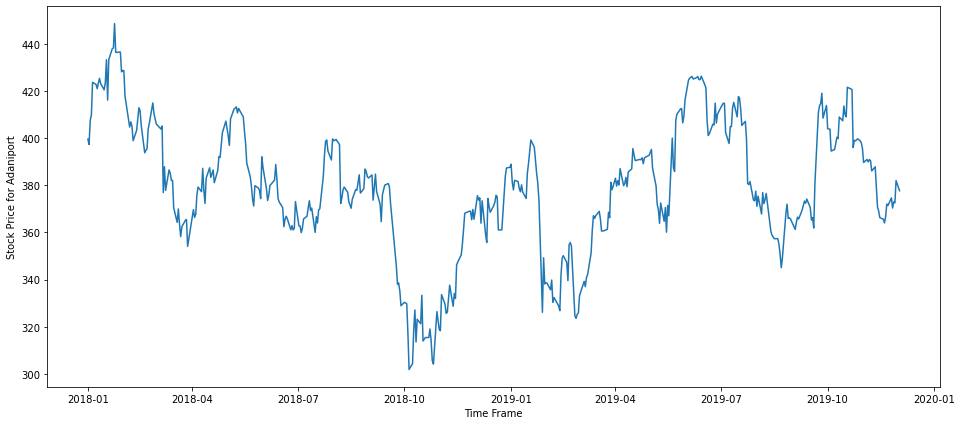

In [8]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for Adaniport')
ax1.plot(AdaniStockData)

# Checking stationarity

In [9]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

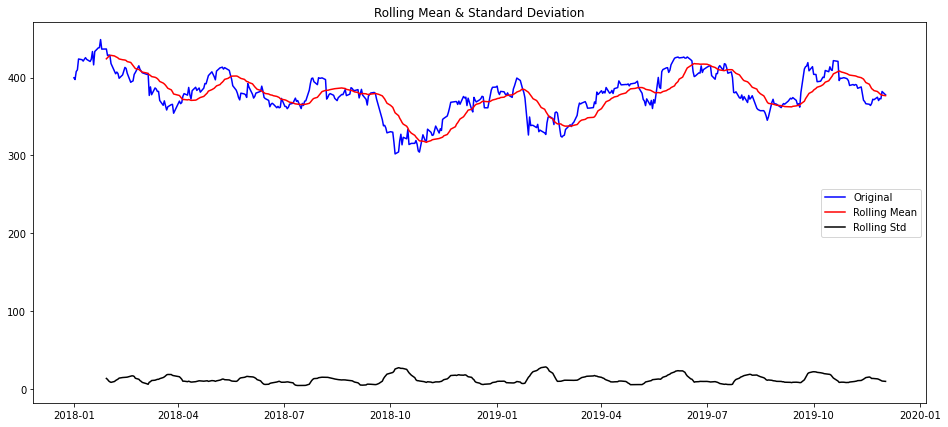

In [10]:
#Determing rolling statistics
rolLmean = AdaniStockData.rolling(20).mean()
rolLstd = AdaniStockData.rolling(20).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(AdaniStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
from statsmodels.tsa.stattools import adfuller 

In [12]:
adftest=adfuller(AdaniStockData)

In [13]:
print('p value of adfuller',adftest[1])
#value is greater than 0.5 so it a non stationary data 

p value of adfuller 0.057802146016112825


# making Series Stationary

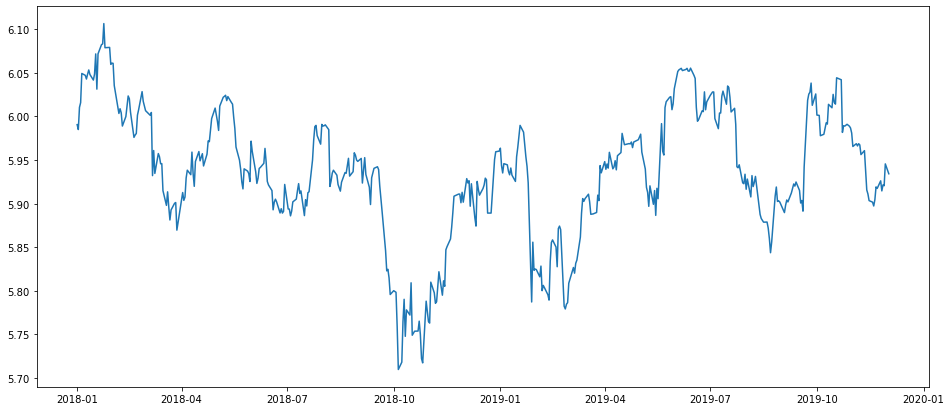

In [14]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(AdaniStockData)
plt.plot(ts_log)

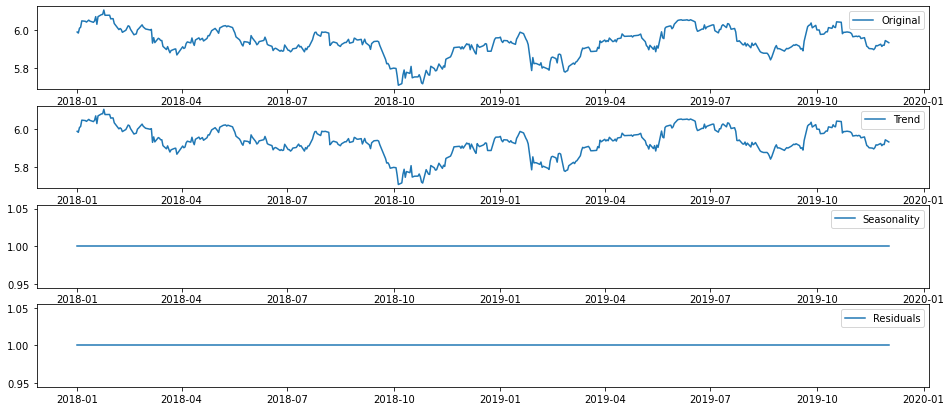

In [15]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

## ARIMA Model Building
### ARIMA model has 3 components
####     1 AR
####    2 MA
####    3 Integrated
#### For building ARIMA  we need the:
#### AR order p
#### MA order q
#### integrated oder d

### Building ARIMA model

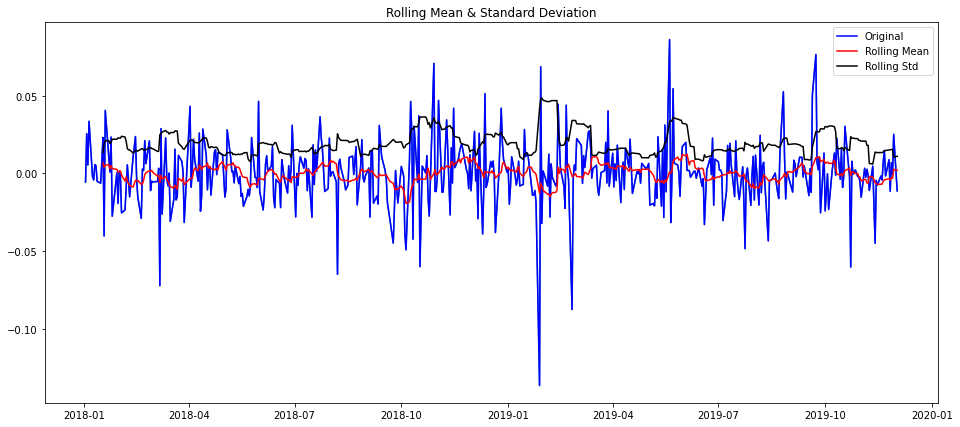

In [16]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
AdaniStockData.sort_index(inplace= True)

<AxesSubplot:ylabel='Density'>

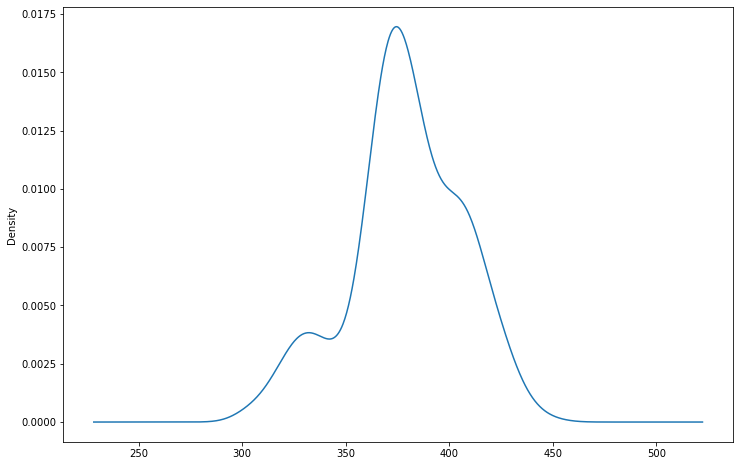

In [18]:
#Distribution of the dataset
fig = plt.figure(figsize=(12,8))
AdaniStockData.plot(kind='kde')

In [19]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

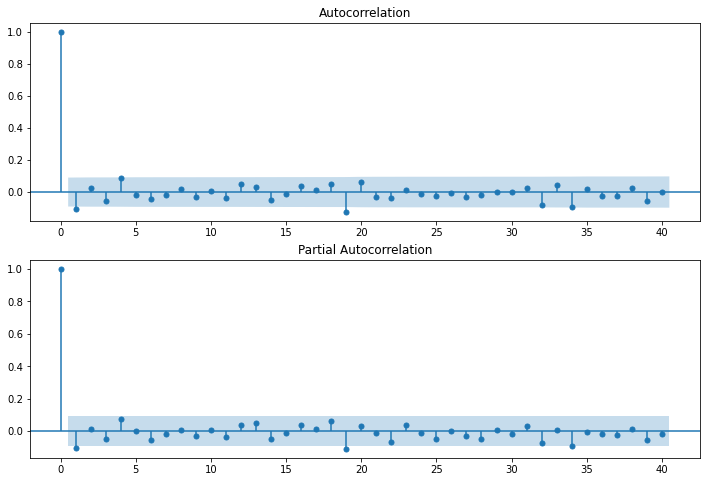

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
type(ts_log_diff)

pandas.core.series.Series

In [23]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

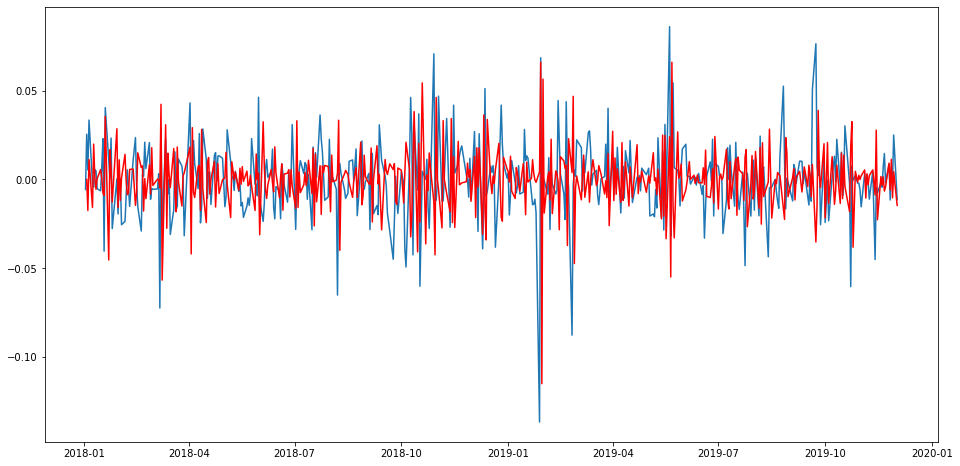

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(1,1,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [25]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  469
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1056.638
Method:                       css-mle   S.D. of innovations              0.025
Date:                Fri, 15 Oct 2021   AIC                          -2107.276
Time:                        23:38:15   BIC                          -2094.825
Sample:                             1   HQIC                         -2102.377
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.089e-06      0.001     -0.011      0.991      -0.001       0.001
ar.L1.D.Close    -0.5605      0.038    -14.645      0.000      -0.635      -0.485
                                    Root

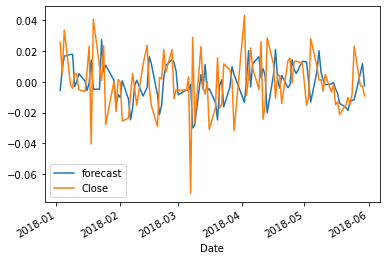

<Figure size 1152x576 with 0 Axes>

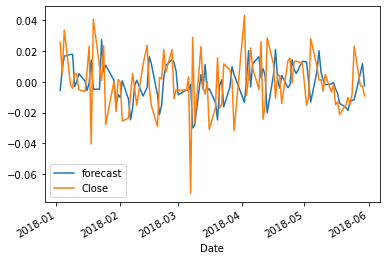

In [26]:
#Actual vs Fitted
plt.figure(figsize=(16,8))
results_ARIMA.plot_predict(start=1,end=100,dynamic=False)

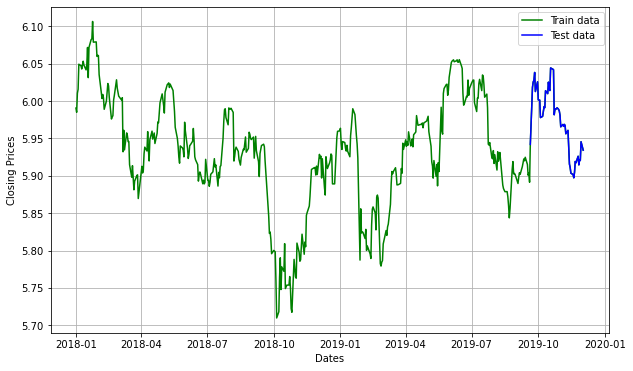

In [27]:
#split data into train and training set
train_data, test_data = ts_log[3:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ts_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [28]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

print(automodel.summary())
automodel.plot_diagnostics(figsize=(15,8))
plt.show()

NameError: name 'automodel' is not defined

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   #  Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
fitted = model.fit(disp=-1) 

fc, se, conf = fitted.forecast(321, alpha=0.05)




fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Taking results back to original scale

In [ ]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

In [ ]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

In [ ]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(AdaniStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-AdaniStockData)**2)/len(AdaniStockData)))

In [ ]:
results_ARIMA.predict(1,200)

In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(ts_log)
#p d q 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(1,1,0))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')